In [1]:
from simulator import Simulator
from coinbase_connector.coinbase_orderbook import CoinbaseOrderBook
from bitfinex_connector.bitfinex_orderbook import BitfinexOrderBook

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
sim = Simulator()
# scaler = StandardScaler()

Attempting to connect to Arctic...
Connected to Arctic.


In [3]:
query = dict({
    'ccy': ['ETC-USD', 'tETCUSD'],
    'start_date': 20181111,
    'end_date': 20181113
})

tick_history = sim.get_tick_history(query)


Getting ['ETC-USD', 'tETCUSD'] tick data from Arctic Tick Store...


/home/jonathan/.local/lib/python3.6/site-packages/arctic/tickstore/tickstore.py:413: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(dtype, int):


Completed querying 3889542 ['ETC-USD', 'tETCUSD'] records in 5 seconds

Splitting 3889542 records into 12 chunks... 324128 records/cpu
Complete splitting pandas into chunks in 0 seconds.
Completed. Process-0 dataframe.to_dict() in 8 seconds
Completed. Process-1 dataframe.to_dict() in 10 seconds
Completed. Process-2 dataframe.to_dict() in 12 seconds
Completed. Process-3 dataframe.to_dict() in 12 seconds
Completed. Process-4 dataframe.to_dict() in 14 seconds
Completed. Process-7 dataframe.to_dict() in 14 seconds
Completed. Process-5 dataframe.to_dict() in 16 seconds
Completed. Process-10 dataframe.to_dict() in 11 seconds
Completed. Process-8 dataframe.to_dict() in 13 seconds
Completed. Process-6 dataframe.to_dict() in 16 seconds
Completed. Process-9 dataframe.to_dict() in 13 seconds
Completed. Process-11 dataframe.to_dict() in 12 seconds
***
Completed get_tick_history() in 30 seconds
***


In [4]:
tick_history[-1]

{'SYMBOL': 'tETCUSD',
 'sequence': nan,
 'order_type': None,
 'size': 45.36317302,
 'remaining_size': None,
 'side': 'sell',
 'funds': None,
 'client_oid': None,
 'price': 9.2771,
 'taker_order_id': None,
 'maker_order_id': None,
 'product_id': 'tETCUSD',
 'time': None,
 'order_id': 18956687637,
 'reason': None,
 'trade_id': nan,
 'type': 'update',
 'system_time': '2018-11-12 22:59:59.821808+00:00'}

In [5]:
coinbaseOrderBook = CoinbaseOrderBook(query['ccy'][0])
bitfinexOrderBook = BitfinexOrderBook(query['ccy'][1])

orderbook_snapshot_history = sim.get_orderbook_snapshot_history(coinbaseOrderBook, 
                                                                bitfinexOrderBook, 
                                                                tick_history[:2000000])


Starting get_orderbook_snapshot_history() with 2000000 ticks for ETC-USD and tETCUSD
sequence gap: ETC-USD missing 146722202 messages. new_sequence: 146722202 [load_book]

--Cleared ETC-USD order book--
ETC-USD first tick: 2018-11-11 14:54:16.087000+00:00 | Sequence: 146722202
--Cleared tETCUSD order book--
...completed 250000 loops in 8 seconds
sequence gap: ETC-USD missing 100489 messages. new_sequence: 146917339 [load_book]

--Cleared ETC-USD order book--
--Cleared tETCUSD order book--
...completed 500000 loops in 16 seconds
...completed 750000 loops in 24 seconds
...completed 1000000 loops in 32 seconds
...completed 1250000 loops in 40 seconds
...completed 1500000 loops in 47 seconds
...completed 1750000 loops in 54 seconds
Completed run_simulation() with 2000000 ticks in 61 seconds at 32786 ticks/second


In [6]:
normalized_data = sim.normalize_orderbook_snapshot_history(orderbook_snapshot_history)

***
Simulator.get_orderbook_snapshot_history_normalized() executed in 0 seconds
***


In [7]:
normalized_data.tail()

,coinbase_midpoint,midpoint_delta,coinbase-bid-notional-0,coinbase-bid-notional-1,coinbase-bid-notional-2,coinbase-bid-distance-0,coinbase-bid-distance-1,coinbase-bid-distance-2,coinbase-ask-notional-0,coinbase-ask-notional-1,...,bitfinex-ask-notional-1,bitfinex-ask-notional-2,bitfinex-ask-distance-0,bitfinex-ask-distance-1,bitfinex-ask-distance-2,bitfinex-buys,bitfinex-sells,t,d,m
105835,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,-0.138395,1.667182,0.163836,0.43851,0.139878,-0.035319,-0.030892,2018-11-12 00:54:05.294000+00:00,12,9.215
105836,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,-0.138395,1.667182,0.163836,0.43851,0.139878,-0.035319,-0.030892,2018-11-12 00:54:05.338000+00:00,12,9.215
105837,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,-0.138395,1.667182,0.163836,0.43851,0.139878,-0.035319,-0.030892,2018-11-12 00:54:05.636000+00:00,12,9.215
105838,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,-0.138395,1.667182,0.163836,0.43851,0.139878,-0.035319,-0.030892,2018-11-12 00:54:06.119000+00:00,12,9.215
105839,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,-0.138395,1.667182,0.163836,0.43851,0.139878,-0.035319,-0.030892,2018-11-12 00:54:06.119000+00:00,12,9.215


In [8]:
orderbook_snapshot_history.head()

,system_time,coinbase_midpoint,midpoint_delta,coinbase-bid-notional-0,coinbase-bid-notional-1,coinbase-bid-notional-2,coinbase-bid-distance-0,coinbase-bid-distance-1,coinbase-bid-distance-2,coinbase-ask-notional-0,...,bitfinex-bid-distance-1,bitfinex-bid-distance-2,bitfinex-ask-notional-0,bitfinex-ask-notional-1,bitfinex-ask-notional-2,bitfinex-ask-distance-0,bitfinex-ask-distance-1,bitfinex-ask-distance-2,bitfinex-buys,bitfinex-sells
10,2018-11-11 14:54:19.032000+00:00,9.305,-0.00005,3509.055183,3694.547503,3759.275596,0.005,0.015,0.025,12817.519625,...,-0.08635,-0.08305,921.86,4149.385,4366.536085,-0.08645,-0.08355,0.03665,0.0,0.0
11,2018-11-11 14:54:19.280000+00:00,9.305,-0.00005,3509.055183,3694.547503,3759.275596,0.005,0.015,0.025,12817.519625,...,-0.08635,-0.08305,921.86,4149.385,4366.536085,-0.08645,-0.08355,0.03665,0.0,0.0
12,2018-11-11 14:54:19.853000+00:00,9.305,-0.00005,3509.055183,3694.547503,3759.275596,0.005,0.015,0.025,12817.519625,...,-0.08635,-0.08305,921.86,4149.385,4366.536085,-0.08645,-0.08355,0.03665,0.0,0.0
13,2018-11-11 14:54:19.853000+00:00,9.305,-0.00005,3509.055183,3694.547503,3759.275596,0.005,0.015,0.025,12817.519625,...,-0.08635,-0.08305,921.86,4149.385,4366.536085,-0.08645,-0.08355,0.03665,0.0,0.0
14,2018-11-11 14:54:19.853000+00:00,9.305,-0.00005,3509.055183,3694.547503,3759.275596,0.005,0.015,0.025,12817.519625,...,-0.08635,-0.08305,921.86,4149.385,4366.536085,-0.08645,-0.08355,0.03665,0.0,0.0


In [9]:
def get_feature_labels(include_system_time=True, lags=0):
    columns = list()

    if include_system_time:
        columns.append('system_time')

    for lag in range(lags + 1):
        if lag == 0:
            columns.append('coinbase_midpoint')
            columns.append('midpoint_delta')
            for exchange in ['coinbase', 'bitfinex']:
                for side in ['bid', 'ask']:
                    for feature in ['notional', 'distance']:
                        for level in range(3):
                            columns.append(('%s-%s-%s-%i' % (exchange, side, feature, level)))
                for trade_side in ['buys', 'sells']:
                    columns.append('%s-%s' % (exchange, trade_side))

            # columns.append('longs')
            # columns.append('shorts')
        else:
            print('lag: %i' % lag)
            columns.append('coinbase_midpoint_%i' % lag)
            columns.append('midpoint_delta_%i' % lag)
            for exchange in ['coinbase', 'bitfinex']:
                for side in ['bid', 'ask']:
                    for feature in ['notional', 'distance']:
                        for level in range(3):
                            columns.append(('%s-%s-%s-%i_%i' % (exchange, side, feature, level, lag)))
                for trade_side in ['buys', 'sells']:
                    columns.append('%s-%s_%i' % (exchange, trade_side, lag))
            # columns.append('longs---%i' % lag)
            # columns.append('shorts---%i' % lag)

    return columns

# get_feature_labels(False, 4)
def append_lags(data, lags=0):
#         start_time = dt.now()

        # add lags to feature set
        if lags > 0:
            columns = get_feature_labels(False)
            for lag in range(1, lags + 1):
                for col in columns:
                    data[('%s_%i' % (col, lag))] = data[col].shift(lag)

        data = data.dropna(axis=0)

#         elapsed = (dt.now() - start_time).seconds
#         print('***\nSimulator.append_lags() executed in %i seconds\n***' % elapsed)

        return data
    
laggg = append_lags(normalized_data, lags=1)

In [20]:
laggg[['coinbase_midpoint','t', 'd', 'm']].head()

,coinbase_midpoint,t,d,m
11,3.038398,2018-11-11 14:54:19.280000+00:00,11,9.305
12,3.038398,2018-11-11 14:54:19.853000+00:00,11,9.305
13,3.038398,2018-11-11 14:54:19.853000+00:00,11,9.305
14,3.038398,2018-11-11 14:54:19.853000+00:00,11,9.305
15,3.038398,2018-11-11 14:54:20.302000+00:00,11,9.305


In [23]:
lagged = sim.append_lags(normalized_data, lags=100)

***
Simulator.append_lags() executed in 40 seconds
***


In [26]:
lagged.tail()

,coinbase_midpoint,midpoint_delta,coinbase-bid-notional-0,coinbase-bid-notional-1,coinbase-bid-notional-2,coinbase-bid-distance-0,coinbase-bid-distance-1,coinbase-bid-distance-2,coinbase-ask-notional-0,coinbase-ask-notional-1,...,bitfinex-bid-distance-1_100,bitfinex-bid-distance-2_100,bitfinex-ask-notional-0_100,bitfinex-ask-notional-1_100,bitfinex-ask-notional-2_100,bitfinex-ask-distance-0_100,bitfinex-ask-distance-1_100,bitfinex-ask-distance-2_100,bitfinex-buys_100,bitfinex-sells_100
105835,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,0.073263,0.025735,-0.509458,-0.138451,0.063614,0.163836,0.386478,0.090767,-0.035319,-0.030892
105836,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,0.073263,0.025735,-0.509458,-0.138451,0.063614,0.163836,0.386478,0.090767,-0.035319,-0.030892
105837,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,0.073263,0.025735,-0.509458,-0.138451,0.063614,0.163836,0.386478,0.090767,-0.035319,-0.030892
105838,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,0.073263,0.025735,-0.509458,-0.138451,0.063614,0.163836,0.386478,0.090767,-0.035319,-0.030892
105839,1.797082,-0.500212,0.826488,0.312374,0.438147,-0.419808,-0.374112,-0.381983,-0.934835,-1.390747,...,0.073263,0.025735,-0.509458,-0.138451,0.063614,0.163836,0.386478,0.090767,-0.035319,-0.030892


In [30]:
data_transformed = orderbook_snapshot_history.iloc[80000:,:].copy()

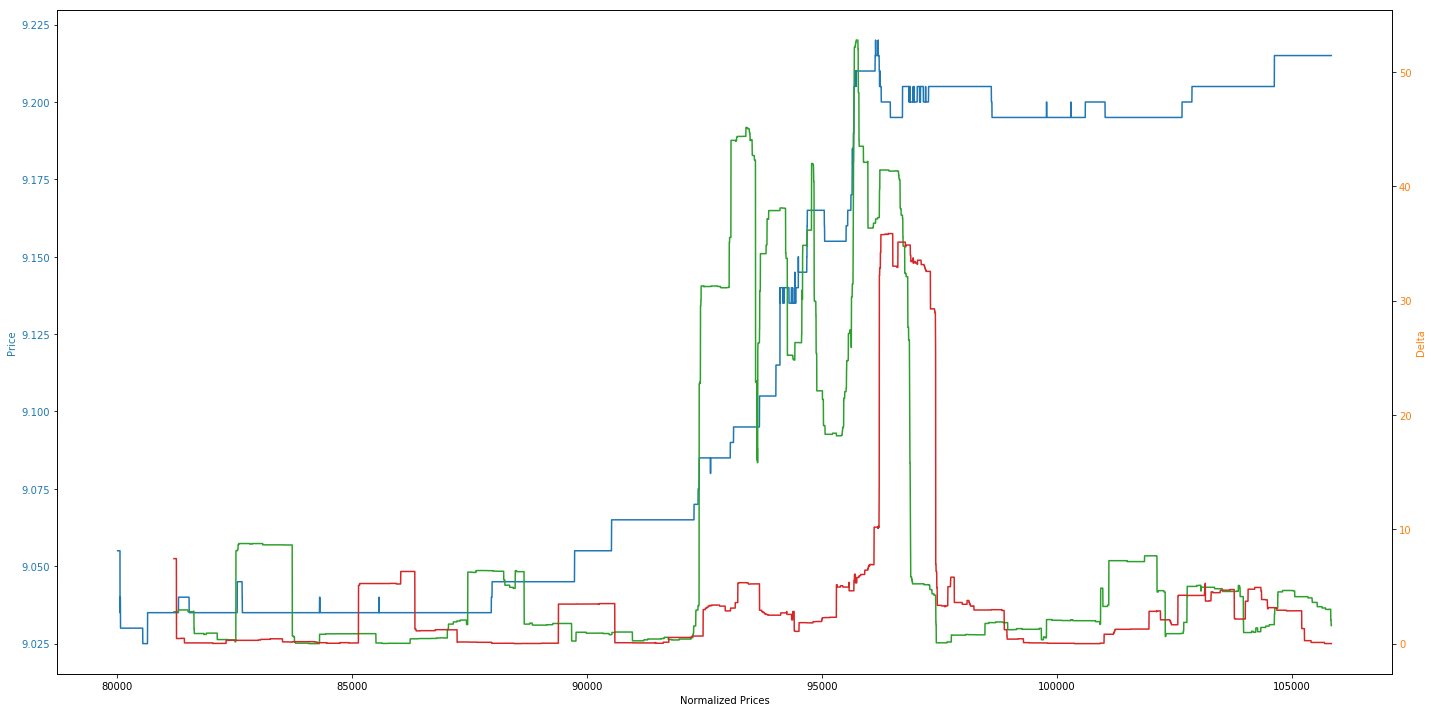

In [31]:

fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:blue'
ax1.set_xlabel('Normalized Prices')
ax1.set_ylabel('Price', color=color)
ax1.plot(data_transformed['coinbase_midpoint'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Delta', color=color)  # we already handled the x-label with ax1
# ax2.plot(data_to_transform['coinbase-sells'].values, color=color)

total_buys = data_transformed['bitfinex-buys'].add(data_transformed['coinbase-buys'])
total_sells = data_transformed['bitfinex-sells'].add(data_transformed['coinbase-sells'])

total_buys = total_buys.rolling(4*60*5).mean()
total_sells = total_sells.rolling(4*60*5).mean()

ax2.plot(total_buys, color='tab:green')
ax2.plot(total_sells, color='tab:red')

# ax2.plot(data_to_transform['bitfinex-sells'].values, color='tab:grey')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [14]:
DEFAULT_ACTION_SET = (
    (1, 0, 0, 0, 0),  # 0. Buy
    (0, 1, 0, 0, 0),  # 1. Close-buy
    (0, 0, 1, 0, 0),  # 2. Short
    (0, 0, 0, 1, 0),  # 3. Cover-short
    (0, 0, 0, 0, 1),  # 4. Do nothing
)

In [15]:
DEFAULT_ACTION_SET[1]

(0, 1, 0, 0, 0)